## Analisis de data set ##

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import (f1_score, roc_auc_score, precision_recall_curve, 
                            roc_curve, plot_confusion_matrix, classification_report, 
                            accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import unicodedata
import joblib

from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
info = pd.read_csv('Colombianos_registrados_en_el_exterior.csv', parse_dates=True)


In [3]:
info

,País,Código ISO país,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Localización,Cantidad de personas
0,ESPAÑA,ESP,C. VALENCIA ESP,ADULTO,42,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",CONTADURÍA PÚBLICA,NO INDICA,CASADO,MASCULINO,NINGUNA,-1,"(40.463667, -3.74922)",1
1,VENEZUELA,VEN,C. MERIDA VEN,ADULTO MAYOR,65,NINGUNA,NINGUNA,NO INDICA,UNION_LIBRE,MASCULINO,OTRO,-1,"(6.42375, -66.58973)",2
2,ESPAÑA,ESP,C. BARCELONA,ADULTO,38,NINGUNA,NINGUNA,BACHILLERATO,UNION_LIBRE,MASCULINO,OTRO,174,"(40.463667, -3.74922)",1
3,ESTADOS UNIDOS,USA,C. HOUSTON,ADULTO,39,CIENCIAS DE LA EDUCACIÓN,EDUCACIÓN,NO INDICA,CASADO,FEMENINO,NINGUNA,-1,"(37.09024, -95.712891)",3
4,BELGICA,BEL,C. BRUSELAS,ADULTO,34,BELLAS ARTES,MÚSICA,NO INDICA,DESCONOCIDO,MASCULINO,OTRO,-1,"(50.503887, 4.469936)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668137,MEXICO,MEX,C. MEXICO,ADULTO JOVEN,27,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,MASCULINO,NINGUNA,179,"(23.634501, -102.552784)",1
668138,VENEZUELA,VEN,C. MERIDA VEN,ADULTO,36,NO INDICA,NO INDICA,PRIMARIA,SOLTERO,MASCULINO,NINGUNA,172,"(6.42375, -66.58973)",1
668139,URUGUAY,URY,C. MONTEVIDEO,ADULTO,36,NINGUNA,NINGUNA,NO INDICA,SOLTERO,MASCULINO,OTRO,-1,"(-32.522779, -55.765835)",1
668140,ESTADOS UNIDOS,USA,C. HOUSTON,ADULTO MAYOR,79,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",ECONOMÍA,NO INDICA,CASADO,MASCULINO,OTRO,-1,"(37.09024, -95.712891)",1


In [4]:
print(info.describe())

         Edad (años)  Estatura (CM)  Cantidad de personas
count  668142.000000  668142.000000         668142.000000
mean       45.200797      85.309862              1.809264
std        16.205043     286.678261              5.126428
min        -1.000000      -1.000000              1.000000
25%        34.000000      -1.000000              1.000000
50%        43.000000     147.000000              1.000000
75%        56.000000     165.000000              1.000000
max       139.000000  163163.000000            396.000000


In [5]:
dataframe_op1 = info.dropna(subset=["Edad (años)"])  

### Deteccion de valores Nulos ### 

In [6]:
info.isnull().sum()

País                     0
Código ISO país          0
Oficina de registro      0
Grupo edad               0
Edad (años)              0
Área Conocimiento        0
Sub Area Conocimiento    0
Nivel Académico          0
Estado civil             0
Género                   0
Etnia de la persona      0
Estatura (CM)            0
Localización             0
Cantidad de personas     0
dtype: int64

No tenemos valores nulos 

### Reformateo de datos ### 

Vamos a cambiar los valores de - 1 que se encuentrar en __Edad (años)__ y en  

In [7]:
 info.replace([1],-1)

,País,Código ISO país,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Localización,Cantidad de personas
0,ESPAÑA,ESP,C. VALENCIA ESP,ADULTO,42,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",CONTADURÍA PÚBLICA,NO INDICA,CASADO,MASCULINO,NINGUNA,-1,"(40.463667, -3.74922)",-1
1,VENEZUELA,VEN,C. MERIDA VEN,ADULTO MAYOR,65,NINGUNA,NINGUNA,NO INDICA,UNION_LIBRE,MASCULINO,OTRO,-1,"(6.42375, -66.58973)",2
2,ESPAÑA,ESP,C. BARCELONA,ADULTO,38,NINGUNA,NINGUNA,BACHILLERATO,UNION_LIBRE,MASCULINO,OTRO,174,"(40.463667, -3.74922)",-1
3,ESTADOS UNIDOS,USA,C. HOUSTON,ADULTO,39,CIENCIAS DE LA EDUCACIÓN,EDUCACIÓN,NO INDICA,CASADO,FEMENINO,NINGUNA,-1,"(37.09024, -95.712891)",3
4,BELGICA,BEL,C. BRUSELAS,ADULTO,34,BELLAS ARTES,MÚSICA,NO INDICA,DESCONOCIDO,MASCULINO,OTRO,-1,"(50.503887, 4.469936)",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668137,MEXICO,MEX,C. MEXICO,ADULTO JOVEN,27,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,MASCULINO,NINGUNA,179,"(23.634501, -102.552784)",-1
668138,VENEZUELA,VEN,C. MERIDA VEN,ADULTO,36,NO INDICA,NO INDICA,PRIMARIA,SOLTERO,MASCULINO,NINGUNA,172,"(6.42375, -66.58973)",-1
668139,URUGUAY,URY,C. MONTEVIDEO,ADULTO,36,NINGUNA,NINGUNA,NO INDICA,SOLTERO,MASCULINO,OTRO,-1,"(-32.522779, -55.765835)",-1
668140,ESTADOS UNIDOS,USA,C. HOUSTON,ADULTO MAYOR,79,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",ECONOMÍA,NO INDICA,CASADO,MASCULINO,OTRO,-1,"(37.09024, -95.712891)",-1


In [8]:
info.describe()

,Edad (años),Estatura (CM),Cantidad de personas
count,668142.000000,668142.000000,668142.000000
mean,45.200797,85.309862,1.809264
std,16.205043,286.678261,5.126428
min,-1.000000,-1.000000,1.000000
25%,34.000000,-1.000000,1.000000
50%,43.000000,147.000000,1.000000
75%,56.000000,165.000000,1.000000
max,139.000000,163163.000000,396.000000


Analizamos que al quitar las filas que la edad minima de 6 años y la estatura minima en cm es de 1, puesto que 1 centimetro no es una estatura adecuada y puede que afecte nuestro analisis, entonces procedemos filtrar por unas tallas minimas promedio, que coresponda adecuadamente con la edad minima promedio entre 6 y 7 años, la cual estaria entre 90 cm bajo el supuesto de que la persona tenga problemas estatura.


<img src = "Tabla_de_pesos_y_estaturas_promedio.PNG">

como podemos ver en la tabla siguiente sacada de la siguiente pagina segun la oms sacada del siguiente [enlace](https://www.ecoparty.com.ar/tabla-orientativa-de-pesos-y-estatura-del-bebe1/)

In [9]:
info = info.drop(info[(info['Estatura (CM)'] >= 0) & (info['Estatura (CM)'] <= 90) ].index)
info.describe()

,Edad (años),Estatura (CM),Cantidad de personas
count,664813.000000,664813.000000,664813.000000
mean,45.331167,85.464514,1.812982
std,16.094309,287.379134,5.138934
min,-1.000000,-1.000000,1.000000
25%,34.000000,-1.000000,1.000000
50%,44.000000,148.000000,1.000000
75%,56.000000,165.000000,1.000000
max,139.000000,163163.000000,396.000000


Listo ya tenemos nuestro dataset limpio con respecto a las edades minimas, ahora hay que revisar las edades y estaturas maximas 
con respecto a las edades, tenemos que __"el límite de la longevidad humana está en 115,7 años para las mujeres y 114,1 años para los hombres".__ Sacado de: [Aqui](https://www.mundodeportivo.com/elotromundo/bienestar/20170906/431090171774/edad-maxima-ser-humano-anos-vida.html#:~:text=As%C3%AD%2C%20el%20l%C3%ADmite%20de%20la,en%20el%20momento%20de%20fallecer.).
Para la estatura tenemos la siguiente información: __"El hombre más alto vivo en Estados Unidos es Igor Vovkovinskiy, quien mide 2,20 metros de altura. El hombre vivo más alto del mundo es Sultan Kösen, quien mide 2,52 metros. Pero el hombre más alto del mundo en toda la historia fue Robert Wadlow, quien murió en 1940 a los 22 años, y medía 2,70 metros de altura."__ [ver pagina qui](https://www.univision.com/explora/que-tan-alta-puede-ser-una-persona)
(con base a esta informacion podemos decidir que la talla maxima que utilizaremos sera de 220 cm y para la edad usaremos 116 años como mucho)

In [10]:
 info.replace([163163],163)
info = info.drop(info[(info['Edad (años)'] >= 117) | (info['Estatura (CM)'] >220)].index)
info.describe()

,Edad (años),Estatura (CM),Cantidad de personas
count,664740.000000,664740.000000,664740.000000
mean,45.326890,84.944493,1.813071
std,16.083606,83.061223,5.139209
min,-1.000000,-1.000000,1.000000
25%,34.000000,-1.000000,1.000000
50%,44.000000,148.000000,1.000000
75%,56.000000,165.000000,1.000000
max,115.000000,220.000000,396.000000


Puesto que ya tenemos nuestro dataset limpio, el siguiente paso sera responder las siguientes preguntas:
* ¿Cuántos colombianos pertenecen al grupo de edades de adultos jóvenes y a que porcentaje de la poblacion pertenece?
* ¿Cuál es la edad promedio de los colombianos que están en el exterior?
* ¿El porcentaje de colombianos que solo obtuvieron básica secundaria (Bachillerato)?


In [11]:
# * ¿Cuántos colombianos pertenecen al grupo de edades de adultos jóvenes en promedio?
info['Grupo edad'].value_counts(normalize=True)

ADULTO              0.674721
ADULTO MAYOR        0.196165
ADULTO JOVEN        0.102933
ADOLESCENTE         0.013332
INFANTE             0.007507
PRIMERA INFANCIA    0.003388
DESCONOCIDO         0.001954
Name: Grupo edad, dtype: float64

In [12]:
info['Grupo edad'].value_counts().to_frame()

,Grupo edad
ADULTO,448514
ADULTO MAYOR,130399
ADULTO JOVEN,68424
ADOLESCENTE,8862
INFANTE,4990
PRIMERA INFANCIA,2252
DESCONOCIDO,1299


<AxesSubplot:>

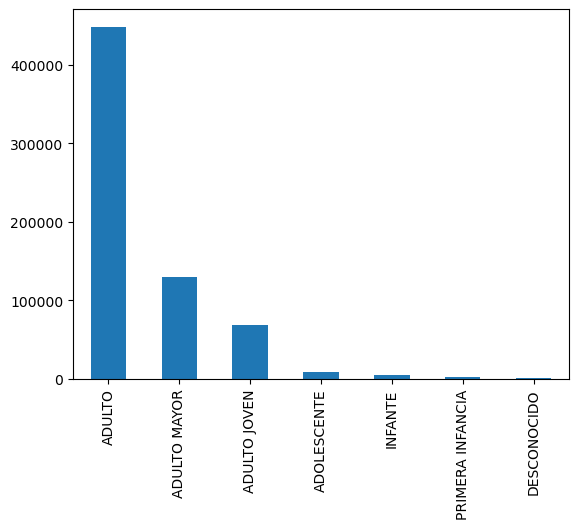

In [13]:
info['Grupo edad'].value_counts().plot(kind="bar")

In [14]:
ADULTO = info['Grupo edad'].str.contains('ADULTO').value_counts()[True]
ADULTO_MAYOR = info['Grupo edad'].str.contains('ADULTO MAYOR').value_counts()[True]
ADULTO_JOVEN = info['Grupo edad'].str.contains('ADULTO JOVEN').value_counts()[True]
ADOLESCENTE = info['Grupo edad'].str.contains('ADOLESCENTE').value_counts()[True]
INFANTE = info['Grupo edad'].str.contains('INFANTE').value_counts()[True]
SUMA = ADULTO+ADULTO_JOVEN+ADULTO_MAYOR+ADOLESCENTE+INFANTE
PORC = ADULTO_JOVEN/SUMA*100
print("hay",str(ADULTO_JOVEN),"adultos jovenes, los cuales representan el",str(round(PORC, 2)),"de la poblacion censada")

hay 68424 adultos jovenes, los cuales representan el 7.96 de la poblacion censada


##### Hasta el momento estos son los avances que tenemos
Esperamos que sea de su agrado profe, y tambien que nos haga las respectivas correcioness inmediatamente para poder presentar un buen proyecto, muchismimas gracias :)

In [15]:
info

,País,Código ISO país,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Localización,Cantidad de personas
0,ESPAÑA,ESP,C. VALENCIA ESP,ADULTO,42,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",CONTADURÍA PÚBLICA,NO INDICA,CASADO,MASCULINO,NINGUNA,-1,"(40.463667, -3.74922)",1
1,VENEZUELA,VEN,C. MERIDA VEN,ADULTO MAYOR,65,NINGUNA,NINGUNA,NO INDICA,UNION_LIBRE,MASCULINO,OTRO,-1,"(6.42375, -66.58973)",2
2,ESPAÑA,ESP,C. BARCELONA,ADULTO,38,NINGUNA,NINGUNA,BACHILLERATO,UNION_LIBRE,MASCULINO,OTRO,174,"(40.463667, -3.74922)",1
3,ESTADOS UNIDOS,USA,C. HOUSTON,ADULTO,39,CIENCIAS DE LA EDUCACIÓN,EDUCACIÓN,NO INDICA,CASADO,FEMENINO,NINGUNA,-1,"(37.09024, -95.712891)",3
4,BELGICA,BEL,C. BRUSELAS,ADULTO,34,BELLAS ARTES,MÚSICA,NO INDICA,DESCONOCIDO,MASCULINO,OTRO,-1,"(50.503887, 4.469936)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668137,MEXICO,MEX,C. MEXICO,ADULTO JOVEN,27,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,MASCULINO,NINGUNA,179,"(23.634501, -102.552784)",1
668138,VENEZUELA,VEN,C. MERIDA VEN,ADULTO,36,NO INDICA,NO INDICA,PRIMARIA,SOLTERO,MASCULINO,NINGUNA,172,"(6.42375, -66.58973)",1
668139,URUGUAY,URY,C. MONTEVIDEO,ADULTO,36,NINGUNA,NINGUNA,NO INDICA,SOLTERO,MASCULINO,OTRO,-1,"(-32.522779, -55.765835)",1
668140,ESTADOS UNIDOS,USA,C. HOUSTON,ADULTO MAYOR,79,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",ECONOMÍA,NO INDICA,CASADO,MASCULINO,OTRO,-1,"(37.09024, -95.712891)",1


In [16]:
info.tail()

,País,Código ISO país,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Localización,Cantidad de personas
668137,MEXICO,MEX,C. MEXICO,ADULTO JOVEN,27,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,MASCULINO,NINGUNA,179,"(23.634501, -102.552784)",1
668138,VENEZUELA,VEN,C. MERIDA VEN,ADULTO,36,NO INDICA,NO INDICA,PRIMARIA,SOLTERO,MASCULINO,NINGUNA,172,"(6.42375, -66.58973)",1
668139,URUGUAY,URY,C. MONTEVIDEO,ADULTO,36,NINGUNA,NINGUNA,NO INDICA,SOLTERO,MASCULINO,OTRO,-1,"(-32.522779, -55.765835)",1
668140,ESTADOS UNIDOS,USA,C. HOUSTON,ADULTO MAYOR,79,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",ECONOMÍA,NO INDICA,CASADO,MASCULINO,OTRO,-1,"(37.09024, -95.712891)",1
668141,MEXICO,MEX,C. GUADALAJARA,ADULTO JOVEN,21,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",ADMINISTRACIÓN,BACHILLERATO,SOLTERO,MASCULINO,NINGUNA,165,"(23.634501, -102.552784)",1


In [17]:
info.describe()

,Edad (años),Estatura (CM),Cantidad de personas
count,664740.000000,664740.000000,664740.000000
mean,45.326890,84.944493,1.813071
std,16.083606,83.061223,5.139209
min,-1.000000,-1.000000,1.000000
25%,34.000000,-1.000000,1.000000
50%,44.000000,148.000000,1.000000
75%,56.000000,165.000000,1.000000
max,115.000000,220.000000,396.000000


In [18]:
info.describe()

,Edad (años),Estatura (CM),Cantidad de personas
count,664740.000000,664740.000000,664740.000000
mean,45.326890,84.944493,1.813071
std,16.083606,83.061223,5.139209
min,-1.000000,-1.000000,1.000000
25%,34.000000,-1.000000,1.000000
50%,44.000000,148.000000,1.000000
75%,56.000000,165.000000,1.000000
max,115.000000,220.000000,396.000000


In [19]:
del(info['Oficina de registro'])
del(info['Código ISO país'])
info
info['País'].unique()

array(['ESPAÑA', 'VENEZUELA', 'ESTADOS UNIDOS', 'BELGICA', 'CANADA',
       'CHILE', 'SUIZA', 'PANAMA', 'PERU', 'FRANCIA', 'ECUADOR',
       'FEDERACION DE RUSIA', 'AUSTRALIA', 'LIBANO', 'TAILANDIA',
       'MEXICO', 'PORTUGAL', 'COSTA RICA', 'JAPON', 'CURAÇAO', 'BRASIL',
       'GUATEMALA', 'REINO UNIDO', 'ITALIA', 'ARGENTINA', 'ARUBA',
       'REPUBLICA DOMINICANA', 'TURQUIA', 'ALEMANIA', 'ISRAEL',
       'HONG KONG', 'BOLIVIA', 'CUBA', 'PAISES BAJOS', 'KENIA',
       'BOSNIA Y HERZEGOVINA', 'NUEVA ZELANDA', 'HONDURAS', 'POLONIA',
       'PARAGUAY', 'QATAR', 'CHINA', 'AUSTRIA', 'LETONIA', 'SUECIA',
       'ANDORRA', 'EMIRATOS ARABES UNIDOS', 'MARRUECOS', 'BULGARIA',
       'URUGUAY', 'CROACIA', 'LUXEMBURGO', 'ST. MAARTEN', 'BONAIRE',
       'RUSIA', 'NORUEGA', 'EL SALVADOR', 'IRLANDA', 'SURINAM',
       'FILIPINAS', 'INDIA', 'TRINIDAD Y TOBAGO', 'CHIPRE', 'MALTA',
       'HUNGRIA', 'GUYANA FRANCESA', 'VIET NAM', 'DINAMARCA', 'GUADALUPE',
       'NIGERIA', 'COREA, REPUBLICA DE', 'PALE

In [20]:
info['Grupo edad'].unique()

array(['ADULTO', 'ADULTO MAYOR', 'ADULTO JOVEN', 'ADOLESCENTE', 'INFANTE',
       'PRIMERA INFANCIA', 'DESCONOCIDO'], dtype=object)

In [21]:
info = info.drop(info[(info['Grupo edad'] == 'DESCONOCIDO')].index)

In [22]:
info['Grupo edad'].unique()

array(['ADULTO', 'ADULTO MAYOR', 'ADULTO JOVEN', 'ADOLESCENTE', 'INFANTE',
       'PRIMERA INFANCIA'], dtype=object)

In [23]:
info['Edad (años)'].unique()

array([ 42,  65,  38,  39,  34,  49,  23,  36,  45,  53,  31,  67,  61,
        14,  43,  41,  44,  48,  64,  63,  47,  37,  56,   6,  55,  58,
        32,  60,  92,  52,  28,  20,  59,  29,  54,  15,  33,  71,  84,
        25,  35,  68,  30,  46,  62,  40,  51,  70,  83,  50,  57,  69,
        93,  73,  74,   5,  77,  22,  26,  82,  18,  75,  27,  85,   8,
        98,  16,  86,  94,  66,  90,  88,  80,  12,  72,  17,  24,  10,
        76,  78,   4,  21,   2,  19,   9,  13,   7,  95,   3,  81,   1,
        79,  96,  87,  11,  89,  91, 104, 103,  97,  99, 100,   0, 106,
       110, 101, 107, 112, 109, 102, 105, 115, 108, 111, 114], dtype=int64)

In [24]:
info['Área Conocimiento'].unique()

array(['ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES', 'NINGUNA',
       'CIENCIAS DE LA EDUCACIÓN', 'BELLAS ARTES', 'NO INDICA',
       'INGENIERÍA, ARQUITECTURA Y AFINES', 'CIENCIAS SOCIALES Y HUMANAS',
       'CIENCIAS DE LA SALUD', 'AGRONOMÍA, VETERINARIA Y AFINES',
       'MATEMÁTICAS Y CIENCIAS NATURALES', '(NO REGISTRA)',
       'COCINA Y CULINARIA', 'AGRONOMÍA, VETERINARIA Y ZOOTECNIA',
       'AVIACIÓN'], dtype=object)

In [25]:
 info.replace(['NO INDICA'],'NINGUNA')


,País,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Localización,Cantidad de personas
0,ESPAÑA,ADULTO,42,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",CONTADURÍA PÚBLICA,NINGUNA,CASADO,MASCULINO,NINGUNA,-1,"(40.463667, -3.74922)",1
1,VENEZUELA,ADULTO MAYOR,65,NINGUNA,NINGUNA,NINGUNA,UNION_LIBRE,MASCULINO,OTRO,-1,"(6.42375, -66.58973)",2
2,ESPAÑA,ADULTO,38,NINGUNA,NINGUNA,BACHILLERATO,UNION_LIBRE,MASCULINO,OTRO,174,"(40.463667, -3.74922)",1
3,ESTADOS UNIDOS,ADULTO,39,CIENCIAS DE LA EDUCACIÓN,EDUCACIÓN,NINGUNA,CASADO,FEMENINO,NINGUNA,-1,"(37.09024, -95.712891)",3
4,BELGICA,ADULTO,34,BELLAS ARTES,MÚSICA,NINGUNA,DESCONOCIDO,MASCULINO,OTRO,-1,"(50.503887, 4.469936)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
668137,MEXICO,ADULTO JOVEN,27,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,MASCULINO,NINGUNA,179,"(23.634501, -102.552784)",1
668138,VENEZUELA,ADULTO,36,NINGUNA,NINGUNA,PRIMARIA,SOLTERO,MASCULINO,NINGUNA,172,"(6.42375, -66.58973)",1
668139,URUGUAY,ADULTO,36,NINGUNA,NINGUNA,NINGUNA,SOLTERO,MASCULINO,OTRO,-1,"(-32.522779, -55.765835)",1
668140,ESTADOS UNIDOS,ADULTO MAYOR,79,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",ECONOMÍA,NINGUNA,CASADO,MASCULINO,OTRO,-1,"(37.09024, -95.712891)",1


In [26]:
info['Área Conocimiento'].unique()

array(['ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES', 'NINGUNA',
       'CIENCIAS DE LA EDUCACIÓN', 'BELLAS ARTES', 'NO INDICA',
       'INGENIERÍA, ARQUITECTURA Y AFINES', 'CIENCIAS SOCIALES Y HUMANAS',
       'CIENCIAS DE LA SALUD', 'AGRONOMÍA, VETERINARIA Y AFINES',
       'MATEMÁTICAS Y CIENCIAS NATURALES', '(NO REGISTRA)',
       'COCINA Y CULINARIA', 'AGRONOMÍA, VETERINARIA Y ZOOTECNIA',
       'AVIACIÓN'], dtype=object)

In [27]:
info['Sub Area Conocimiento'].unique()

array(['CONTADURÍA PÚBLICA', 'NINGUNA', 'EDUCACIÓN', 'MÚSICA',
       'NO INDICA', 'ADMINISTRACIÓN', 'INGENIERÍA QUÍMICA Y AFINES',
       'INGENIERÍA INDUSTRIAL Y AFINES',
       'INGENIERÍA EN SISTEMAS, TELEMÁTICA Y AFINES', 'DERECHO Y AFINES',
       'MEDICINA', 'ARQUITECTURA', 'INGENIERÍA CIVIL Y AFINES',
       'OTROS ESTUDIOS EN CIENCIAS SOCIALES Y HUMANAS',
       'OTRO PROGRAMA DE BELLAS ARTES',
       'PERIODISMO, COMUNICACIÓN SOCIAL Y AFINES',
       'INGENIERÍA DE PETRÓLEOS',
       'INGENIERÍA ELECTRÓNICA, TELECOMUNICACIONES Y AFINES',
       'ENFERMERÍA', 'PSICOLOGÍA Y AFINES', 'PUBLICIDAD Y AFINES',
       'DISEÑO', 'OTRO PROGRAMA DE SALUD',
       'INGENIERÍA AGROINDUSTRIAL, ALIMENTOS Y AFINES', 'AVIACIÓN',
       'AGRONOMÍA', 'INGENIERÍA MECÁNICA Y AFINES', 'OTRAS INGENIERÍAS',
       'ARTES PLÁSTICAS, VISUALES Y AFINES',
       'LENGUAS MODERNAS, FILOLOGÍA, LINGÜÍSTICA Y AFINES', 'ODONTOLOGÍA',
       'ECONOMÍA', 'QUÍMICA Y AFINES', 'INGENIERÍA ELÉCTRICA Y AFINES',
   

In [28]:
info['Nivel Académico'].unique()

array(['NO INDICA', 'BACHILLERATO', 'PREGRADO - TÉCNICO PROFESIONAL',
       'PREGRADO - TECNOLÓGICO', 'PREGRADO - PROFESIONAL', 'PRIMARIA',
       'POSTGRADO - MAESTRIA', 'NINGUNO', 'POSTGRADO - ESPECIALIZACIÓN',
       'POSTGRADO - DOCTORADO', '(NO REGISTRA)', 'SIN PROFESIÓN'],
      dtype=object)

In [29]:
info['Estado civil'].unique()

array(['CASADO', 'UNION_LIBRE', 'DESCONOCIDO', 'SOLTERO', 'DIVORCIADO',
       'VIUDO'], dtype=object)

In [30]:
info['Género'].unique()

array(['MASCULINO', 'FEMENINO', 'DESCONOCIDO'], dtype=object)

In [31]:
info['Etnia de la persona'].unique()

array(['NINGUNA', 'OTRO', 'AFRODESCENDIENTE', 'SIN ETNIA REGISTRADA',
       'INDÍGENA', 'RAIZAL DEL ARCHIPIELAGO DE SAN ANDRES', 'GITANO',
       'PALENQUERO DE SAN BASILO', 'PALENQUERO DE SAN BASILIO'],
      dtype=object)

In [32]:
info['Estatura (CM)'].unique()

array([ -1, 174, 165, 148, 160, 159, 156, 170, 182, 158, 155, 163, 175,
       167, 157, 143, 162, 169, 172, 153, 154, 140, 176, 171, 152, 178,
       180, 173, 177, 181, 179, 161, 151, 168, 166, 134, 164, 150, 187,
       130, 186, 185, 188, 149, 145, 183, 190, 189,  93, 184, 147, 193,
       100, 102, 135, 120, 136, 110, 194, 128, 138, 117, 146, 109, 200,
       108, 115, 142, 196, 105, 112, 141,  92, 125, 132, 119, 127, 192,
       144, 129, 124,  98, 118, 139, 137,  95, 195, 123, 107, 199, 106,
       198, 191, 103,  97, 205, 113, 116, 121, 122, 114, 133,  94, 197,
       111, 131, 126, 202, 104,  99, 101, 203, 210,  91,  96, 206, 204,
       215, 201, 220], dtype=int64)

In [33]:
info['Localización'].unique()

array(['(40.463667, -3.74922)', '(6.42375, -66.58973)',
       '(37.09024, -95.712891)', '(50.503887, 4.469936)',
       '(56.130366, -106.346771)', '(-35.675147, -71.542969)',
       '(46.818188, 8.227512)', '(8.537981, -80.782127)',
       '(-9.189967, -75.015152)', '(46.227638, 2.213749)',
       '(-1.831239, -78.183406)', '(61.52401, 105.318756)',
       '(-25.274398, 133.775136)', '(33.854721, 35.862285)',
       '(15.870032, 100.992541)', '(23.634501, -102.552784)',
       '(39.399872, -8.224454)', '(9.748917, -83.753428)',
       '(36.204824, 138.252924)', '(12.16957, -68.990021)',
       '(-14.235004, -51.92528)', '(15.783471, -90.230759)',
       '(55.378051, -3.435973)', '(41.87194, 12.56738)',
       '(-38.416097, -63.616672)', '(12.52111, -69.968338)',
       '(18.735693, -70.162651)', '(38.963745, 35.243322)',
       '(51.165691, 10.451526)', '(31.046051, 34.851612)',
       '(22.396428, 114.109497)', '(-16.290154, -63.588653)',
       '(21.521757, -77.781167)', '(52.13263

In [34]:
info['Cantidad de personas'].unique()

array([  1,   2,   3,  12,   4,  23,   6,  10,   5,  15,  16,  30,   9,
        14,  24,   8,  87,  21,  11,   7,  51,  27,  13,  41, 122,  43,
        20,  55,  25,  33,  17,  65,  19,  39,  18,  72,  28,  35,  96,
        32,  45,  48,  36,  46,  22,  26,  71,  34,  37,  31,  44,  50,
       105,  40,  74,  53,  29,  84,  63,  73, 157,  81,  52,  89, 279,
        70, 163,  58,  47,  56,  59,  82, 158,  75,  42, 193, 162, 102,
        92,  69, 101,  38,  66,  80, 144,  98,  88,  97,  94,  99,  49,
        57,  64, 133,  78, 111, 146, 141, 100,  61,  62, 137, 124,  68,
       209,  67,  54,  83, 115, 123,  76,  90, 109,  79,  77,  60,  85,
       118, 152, 121, 165, 155, 110, 135, 104, 125, 132, 128, 103, 147,
       106, 130, 114, 116, 160, 170, 182, 149, 113, 139, 153, 205, 126,
        93, 138,  91,  86, 167, 107, 140,  95, 164, 145, 207, 172, 119,
       161, 203, 186, 197, 112, 148, 242, 136, 159, 150, 276, 306, 229,
       129, 168, 179, 241, 151, 156, 142, 174, 131, 143, 108, 19

In [35]:
info.rename(columns = {'Área Conocimiento':'Area Conocimiento', 'País':'Pais'}, inplace = True)
info.head(2)

,Pais,Grupo edad,Edad (años),Area Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Localización,Cantidad de personas
0,ESPAÑA,ADULTO,42,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",CONTADURÍA PÚBLICA,NO INDICA,CASADO,MASCULINO,NINGUNA,-1,"(40.463667, -3.74922)",1
1,VENEZUELA,ADULTO MAYOR,65,NINGUNA,NINGUNA,NO INDICA,UNION_LIBRE,MASCULINO,OTRO,-1,"(6.42375, -66.58973)",2


In [36]:
info["Area Conocimiento"].replace({"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES":"ECONOMIA ADMINISTRACION CONTADURIA Y AFINES",
                                  "CIENCIAS DE LA EDUCACIÓN":"CIENCIAS DE LA EDUCACION","INGENIERÍA":"INGENIERIA",
                                  "AGRONOMÍA":"AGRONOMIA","MATEMÁTICAS Y CIENCIAS NATURALES":"MATEMATICAS Y CIENCIAS NATURALES",
                                  "(NO REGISTRA)":"NO REGISTRA","AGRONOMÍA, VETERINARIA Y ZOOTECNIA":"AGRONOMIA VETERINARIA Y ZOOTECNIA",
                                  "AVIACIÓN":"AVIACION"}, inplace=True)

In [37]:
info["Area Conocimiento"].unique()

array(['ECONOMIA ADMINISTRACION CONTADURIA Y AFINES', 'NINGUNA',
       'CIENCIAS DE LA EDUCACION', 'BELLAS ARTES', 'NO INDICA',
       'INGENIERÍA, ARQUITECTURA Y AFINES', 'CIENCIAS SOCIALES Y HUMANAS',
       'CIENCIAS DE LA SALUD', 'AGRONOMÍA, VETERINARIA Y AFINES',
       'MATEMATICAS Y CIENCIAS NATURALES', 'NO REGISTRA',
       'COCINA Y CULINARIA', 'AGRONOMIA VETERINARIA Y ZOOTECNIA',
       'AVIACION'], dtype=object)

In [38]:
info.columns = info.columns.str.upper()

In [39]:
info.rename(columns={"EDAD (AÑOS)":"EDAD", "NIVEL ACADÉMICO":"NIVEL ACADEMICO","GÉNERO":"GENERO","ESTATURA (CM)":"ESTATURA","LOCALIZACIÓN":"LOCALIZACION"}, inplace=True)

In [40]:
info.columns

Index(['PAIS', 'GRUPO EDAD', 'EDAD', 'AREA CONOCIMIENTO',
       'SUB AREA CONOCIMIENTO', 'NIVEL ACADEMICO', 'ESTADO CIVIL', 'GENERO',
       'ETNIA DE LA PERSONA', 'ESTATURA', 'LOCALIZACION',
       'CANTIDAD DE PERSONAS'],
      dtype='object')

In [41]:
info.dtypes

PAIS                     object
GRUPO EDAD               object
EDAD                      int64
AREA CONOCIMIENTO        object
SUB AREA CONOCIMIENTO    object
NIVEL ACADEMICO          object
ESTADO CIVIL             object
GENERO                   object
ETNIA DE LA PERSONA      object
ESTATURA                  int64
LOCALIZACION             object
CANTIDAD DE PERSONAS      int64
dtype: object

In [42]:
info[['s','d']] = info['LOCALIZACION'].str.split(pat=",",expand=True)
info[['e','LocalizaciónY']] = info['s'].str.split(pat="(",expand=True)
info[['LocalizaciónX','g']] = info['d'].str.split(pat=")",expand=True)
info = info.drop(['s','d','e','g'],axis=1)
info['LocalizaciónY'] = pd.to_numeric(info['LocalizaciónY'],errors='coerce')
info['LocalizaciónX'] = pd.to_numeric(info['LocalizaciónX'],errors='coerce')


In [43]:
info.to_csv('Colombianos_registrados.csv',sep=';', index=False)

# Matrix de Correlación

<AxesSubplot:xlabel='x', ylabel='y'>

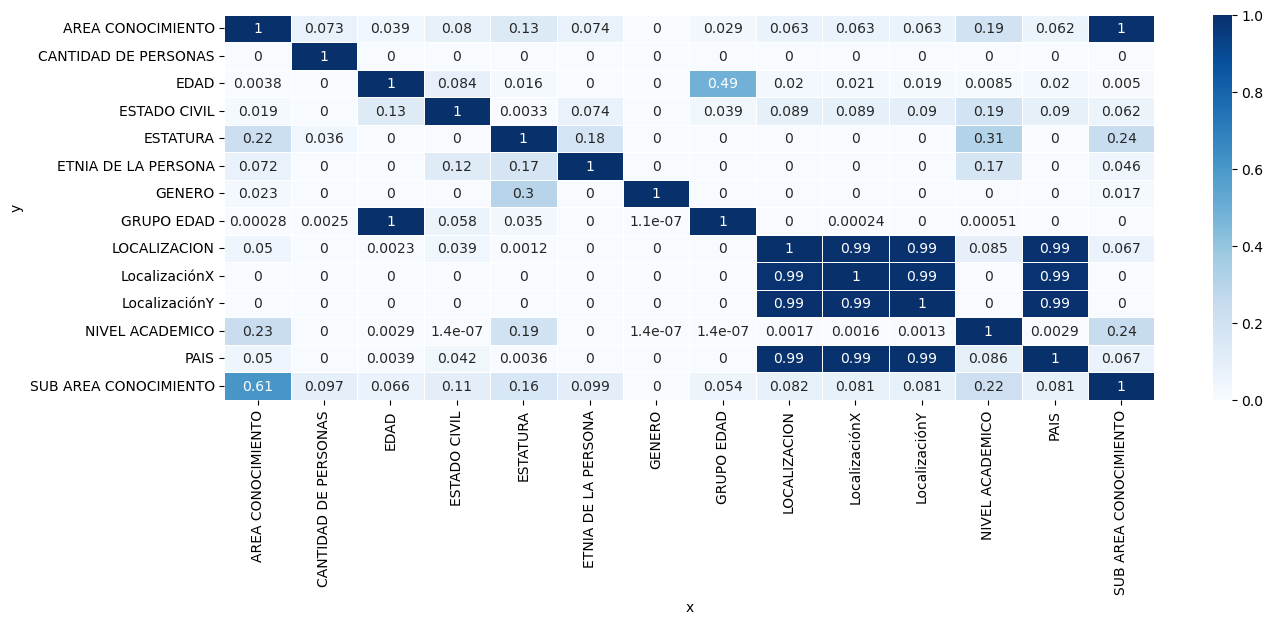

In [44]:
matrix_df = pps.matrix(info)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(15,5))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [45]:
#dd = info.groupby(["Edad (años)", "Género"]).count().reset_index()
#dd = info[(info['Edad (años)'] > 50) & (info['Género'] == "FEMENINO") ]
#dd.groupby(["País","Cantidad de personas"]).count().reset_index().sort_values('Cantidad de personas',ascending=False)


# Modeling

In [46]:
info.columns

Index(['PAIS', 'GRUPO EDAD', 'EDAD', 'AREA CONOCIMIENTO',
       'SUB AREA CONOCIMIENTO', 'NIVEL ACADEMICO', 'ESTADO CIVIL', 'GENERO',
       'ETNIA DE LA PERSONA', 'ESTATURA', 'LOCALIZACION',
       'CANTIDAD DE PERSONAS', 'LocalizaciónY', 'LocalizaciónX'],
      dtype='object')

In [50]:
df = info[["AREA CONOCIMIENTO","ESTADO CIVIL", "NIVEL ACADEMICO","SUB AREA CONOCIMIENTO","PAIS"]].copy()
df.head(3)

,AREA CONOCIMIENTO,ESTADO CIVIL,NIVEL ACADEMICO,SUB AREA CONOCIMIENTO,PAIS
0,ECONOMIA ADMINISTRACION CONTADURIA Y AFINES,CASADO,NO INDICA,CONTADURÍA PÚBLICA,ESPAÑA
1,NINGUNA,UNION_LIBRE,NO INDICA,NINGUNA,VENEZUELA
2,NINGUNA,UNION_LIBRE,BACHILLERATO,NINGUNA,ESPAÑA


In [51]:
def get_X_y(df, y_name):
  """
  Divide un DataFrame en X (características) e y (variable de respuesta)
  Parámetros
  ----------
  df : DataFrame
      Un DataFrame que tiene las características de la columna.
  y_name : str
      El nombre de la variable de destino en el DataFrame.

  Devuelve
  -------
  X : DataFrame
      DataFrame con las características utilizadas para predecir y.
  y : Array(int)
      Array con los valores de la variable de respuesta.
  """
  y=[y_name]
  X=[col for col in df.columns if col not in y]
  y=df[y].copy().values.flatten()
  X=pd.get_dummies(df[X].copy())
  return X, y


def data_preprocessing_up_or_down_sample(X, y, sample="up", test_size=0.2):
  """
  Aplica el muestreo descendente o el muestreo ascendente, y devuelve la división Train-Test 
  de los datos.
  Parámetros
  ----------
  X : DataFrame
      DataFrame con las características utilizadas para predecir y.
  y : Array(int)
      Array con los valores de la variable de respuesta.
  sample : str(opcional)
      Elige el método a aplicar. Downsampling ("down"), 
      upsampling ("up") o ningún método (cualquier otro). Por defecto es "up". 
  test_size : float(opcional)
      Establece el parámetro test_size de sklearn.model_selection.train_test_split.
      Por defecto es 0.2
  
  Devuelve
  -------
  división : lista, longitud=2 * len(arrays)
      Lista que contiene la división train-test de las entradas, con el método definido por
      el parámetro sample aplicado.
  """

  # Utilice el parámetro de muestra para definir las variables locales para seleccionar el 
  # método
  a,b=0,0
  if sample=="up": 
    a,b=1,0
  if sample=="down":
    a,b=0,1 

  
  # Aplicar el normal train_test_split a los datos
  X_train, X_test, y_train, y_test = train_test_split( X, y, \
                                        test_size=test_size)
  # Usando las variables locales a y b, aplique downsampling o upsampling sólo
  # si el parámetro de muestreo es "up" o "down".

  if a+b>=1:
    X_train_temp, y_train_temp = resample(X_train[y_train == a],
                                    y_train[y_train == a],
                                    n_samples=X_train[y_train == b].shape[0])
    X_train = np.concatenate((X_train[y_train == b], X_train_temp))
    y_train = np.concatenate((y_train[y_train == b], y_train_temp))
  return (X_train, X_test, y_train, y_test)

def plot_roc_conf_matrix(y_test,X_test, model, model_name):
  """
  Imprime el informe de clasificación y la matriz de confusión 
  para un modelo determinado.

  Argumentos
  ---------
  y_test : {matriz dispersa tipo array} de forma (n_muestras, n_características)
      Valores objetivo
  X_test : {matriz dispersa similar a un array} de forma (n_muestras, n_características)
      Valores de entrada
  modelo : objeto estimador.
      Ya sea de las interfaces sklearn o keras
  model_name : str
      Nombre del modelo. Se utiliza como parte de los títulos del gráfico
  
  """
  try:
    y_pred=model.predict_classes(X_test)
  except:
    y_pred=model.predict(X_test)
  cm = metrics.confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
  plt.title(model_name+ " - Matriz de confusión", y=1.1, \
            fontdict={"fontsize": 21})
  plt.xlabel("Predicted", fontdict={"fontsize": 14})
  plt.ylabel("Actual", fontdict={"fontsize": 14})
 
  print(classification_report(y_test, y_pred))
  plt.subplot(1,2,2)


def apply_model_to_df(data, model, model_name):
  """
  Aplica un estimador sklearn a un DataFrame. 
  Devuelve un modelo ajustado y muestra información relevante del
  rendimiento del modelo (le aplica la función plot_roc_conf_matrix)

  Parámetros
  ----------
  datos : Lista de arrays
      Lista de arrays, equivalente a la salida de la función
      sklearn.model_selection.train_test_split  
  model : objeto estimador.
      Puede ser de las interfaces sklearn o keras
  model_name : str
      Nombre del modelo. Se utiliza como parte de los títulos del gráfico.
  
  Devuelve
  -------
  model : instancia de estimador
      Clasificador ajustado o una tubería ajustada en la que el último estimador 
      es un clasificador.
  """
  X_train, X_test, y_train, y_test=data
  model.fit(X_train, y_train)
  #y_pred = model.predict(X_test)
  print('el accuracy_score es de ', accuracy_score(y_test,model.predict(X_test)))
  return model

In [52]:
X,y=get_X_y(df, "PAIS")
# Se crean conjuntos para probar upsampling, downsampling y sin pre-procesado
data_up = data_preprocessing_up_or_down_sample(X, y ,"up", test_size=0.2)
data_down = data_preprocessing_up_or_down_sample(X, y ,"down", test_size=0.2)
data_as_is= data_preprocessing_up_or_down_sample(X, y ,"None", test_size=0.2)

In [ ]:
lr_no=apply_model_to_df(data_as_is,LogisticRegression(class_weight="balanced"), "Regresión Logística")

In [ ]:
joblib.dump(lr_no, 'modelR.pkl')

In [ ]:
sv_asis=apply_model_to_df(data_as_is,SVC(kernel = 'rbf'),"Support Vector Machine")

In [52]:
rf_asis=apply_model_to_df(data_as_is,RandomForestClassifier(),"Random Forest - Data As Is")

MemoryError: could not allocate 379584512 bytes

In [43]:
modelo_cargado=joblib.load('model.pkl')
modelo_cargado.predict(X_test)

array(['VENEZUELA', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', ...,
       'ESTADOS UNIDOS', 'ESPAÑA', 'VENEZUELA'], dtype=object)

In [48]:
variables_=[ 'Área Conocimiento','Sub Area Conocimiento','Estado civil','Etnia de la persona']
[ (i, info[i].unique()) for i in variables_]

[('Área Conocimiento',
  array(['ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES', 'NINGUNA',
         'CIENCIAS DE LA EDUCACIÓN', 'BELLAS ARTES', 'NO INDICA',
         'INGENIERÍA, ARQUITECTURA Y AFINES', 'CIENCIAS SOCIALES Y HUMANAS',
         'CIENCIAS DE LA SALUD', 'AGRONOMÍA, VETERINARIA Y AFINES',
         'MATEMÁTICAS Y CIENCIAS NATURALES', '(NO REGISTRA)',
         'COCINA Y CULINARIA', 'AGRONOMÍA, VETERINARIA Y ZOOTECNIA',
         'AVIACIÓN'], dtype=object)),
 ('Sub Area Conocimiento',
  array(['CONTADURÍA PÚBLICA', 'NINGUNA', 'EDUCACIÓN', 'MÚSICA',
         'NO INDICA', 'ADMINISTRACIÓN', 'INGENIERÍA QUÍMICA Y AFINES',
         'INGENIERÍA INDUSTRIAL Y AFINES',
         'INGENIERÍA EN SISTEMAS, TELEMÁTICA Y AFINES', 'DERECHO Y AFINES',
         'MEDICINA', 'ARQUITECTURA', 'INGENIERÍA CIVIL Y AFINES',
         'OTROS ESTUDIOS EN CIENCIAS SOCIALES Y HUMANAS',
         'OTRO PROGRAMA DE BELLAS ARTES',
         'PERIODISMO, COMUNICACIÓN SOCIAL Y AFINES',
         'INGENIERÍA DE PETR

In [45]:
X_train.columns

Index(['Estatura (CM)', 'Área Conocimiento_AGRONOMÍA, VETERINARIA Y AFINES',
       'Área Conocimiento_AGRONOMÍA, VETERINARIA Y ZOOTECNIA',
       'Área Conocimiento_AVIACIÓN', 'Área Conocimiento_BELLAS ARTES',
       'Área Conocimiento_CIENCIAS DE LA EDUCACIÓN',
       'Área Conocimiento_CIENCIAS DE LA SALUD',
       'Área Conocimiento_CIENCIAS SOCIALES Y HUMANAS',
       'Área Conocimiento_COCINA Y CULINARIA',
       'Área Conocimiento_ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES',
       'Área Conocimiento_INGENIERÍA, ARQUITECTURA Y AFINES',
       'Área Conocimiento_MATEMÁTICAS Y CIENCIAS NATURALES',
       'Área Conocimiento_NINGUNA', 'Área Conocimiento_NO INDICA',
       'Sub Area Conocimiento_ADMINISTRACIÓN',
       'Sub Area Conocimiento_AGRONOMÍA',
       'Sub Area Conocimiento_ANTROPOLOGÍA O ARTES LIBERALES',
       'Sub Area Conocimiento_ARQUITECTURA',
       'Sub Area Conocimiento_ARTES DRAMÁTICAS Y REPRESENTATIVAS',
       'Sub Area Conocimiento_ARTES PLÁSTICAS, VISUALES Y

In [43]:
#LogisticRegression 
log = LogisticRegression(max_iter=100,       
                         multi_class='auto',
                         solver='lbfgs',
                         random_state= 42)

In [44]:
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print('El desempeño del modelo en accuracy es de :', accuracy_score(y_test,y_pred))

El desempeño del modelo en accuracy es de : 0.28605234797157264


In [46]:
joblib.dump(log, 'modelRF1.pkl')

['modelRF1.pkl']

In [48]:
#randomforest
clf = RandomForestClassifier(n_estimators=150,
                             criterion = 'gini',
                             max_depth=5,
                             random_state = 42)
clf.fit(X_train, y_train)
print('el accuracy_score del Random Forest utilizando 150 arboles es de ', accuracy_score(y_test,clf.predict(X_test)))

el accuracy_score del Random Forest utilizando 150 arboles es de  0.2719441702025036


In [ ]:
## Realizar de busqueda de hiperparametros.

parametros = {'n_estimators': [150,250,300,],
              'max_features': ['sqrt', 'log2'],
              'max_depth':[5,28,350,67],
              'criterion': ['gini','entropy']}

clf_rf = GridSearchCV(clf,
                      parametros,
                      cv=10,
                      scoring = 'accuracy',
                      n_jobs=-1)
clf_rf.fit(X_train, y_train)
print('el accuracy_score del Random Forest utilizando 150 arboles es de ', accuracy_score(y_test,clf_rf.predict(X_test)))

In [ ]:
parameters = {"C":np.logspace(-3,3,10),
              "max_iter":[200,300,400,500,1000],
              "solver":["saga","liblinear"],
              "penalty":["l1","l2"]}

# Instanciamos la busqueda
log2 = GridSearchCV(log,
                    parameters,
                    cv=10,
                    scoring =  'accuracy')
log2.fit(X_train, y_train)  

In [ ]:
y_pred2 =  log2.predict(X_test)
print("Resultados luego de busqueda de hiperparametros, el accuracy fue de: ", accuracy_score(y_test, y_pred2) )

In [ ]:
fd = SVC(kernel = 'rbf',
          gamma = 'scale',
          max_iter=-1)
fd.fit(X_train, y_train)

In [ ]:
y_fd = fd.predict(X_test)
print('El accuracy del modelo SVM es de:', accuracy_score(y_test,y_fd))

In [ ]:
parameters = [{'kernel':['rbf'],
              'gamma':['auto','scale']}, #DICCIONARIO 1 PORQUE EL KERNEL RBF ACTIVA EL PARAMETRO DE GAMA
              {'kernel':['linear'],
               'C':[1,10,20,30,40]}]        # DICCIONARIO 2 PORQUE EL KERNEL LINEAL TRABAJA CON ESA VARIABLE C 


fd2 = GridSearchCV(fd,                  # Metodo inicial
                    parameters,           # Parametros a buscar  
                    cv=10,                 # Cross validation  
                    scoring = 'accuracy') # metrica que quiero optimizar
fd2.fit(X_train_bow, y_train_bow)

In [ ]:
y_fd2 = fd2.predict(X_test_bow)
accuracy_score(y_test_bow,y_fd2)